In [2]:
import pandas as pd

# Load the dataset (replace the path with your local path to the CSV file)
dft_road_accident_data = pd.read_csv('dft-road-casualty-statistics-accident-last-5-years.csv')

# Preview the first few rows of the data
print(dft_road_accident_data.head())


C:\Users\anura\AppData\Local\Temp\ipykernel_16800\2757377044.py:4: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  dft_road_accident_data = pd.read_csv('dft-road-casualty-statistics-accident-last-5-years.csv')


  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2017010001708           2017           10001708               532920.0   
1  2017010009342           2017           10009342               526790.0   
2  2017010009344           2017           10009344               535200.0   
3  2017010009348           2017           10009348               534340.0   
4  2017010009350           2017           10009350               533680.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                196330.0  -0.080107  51.650061             1   
1                181970.0  -0.173845  51.522425             1   
2                181260.0  -0.052969  51.514096             1   
3                193560.0  -0.060658  51.624832             1   
4                187820.0  -0.072372  51.573408             1   

   accident_severity  number_of_vehicles  ...  \
0                  1                   2  ...   
1                  3                   2  ...   

In [3]:
# Check for missing values in each column
print(dft_road_accident_data.isnull().sum())


accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          133
location_northing_osgr                         133
longitude                                      143
latitude                                       143
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [4]:
# Check for duplicate rows
duplicate_rows = dft_road_accident_data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")


Number of duplicate rows: 0


In [5]:
from scipy import stats
import numpy as np

# Calculate Z-scores
z_scores = np.abs(stats.zscore(dft_road_accident_data.select_dtypes(include=[np.number])))

# Get boolean array indicating the presence of outliers
outliers = (z_scores > 3)

# Count outliers per column
outliers_count = pd.DataFrame(outliers, columns=dft_road_accident_data.select_dtypes(include=[np.number]).columns).sum()
print(outliers_count)


accident_year                                      0
location_easting_osgr                              0
location_northing_osgr                             0
longitude                                          0
latitude                                           0
police_force                                       0
accident_severity                               7870
number_of_vehicles                             12870
number_of_casualties                           11917
day_of_week                                        0
local_authority_district                           0
first_road_class                                   0
first_road_number                              15864
road_type                                          0
speed_limit                                        0
junction_detail                                 6341
junction_control                                   0
second_road_class                                  0
second_road_number                            

In [6]:
# Identify types of variables (categorical, numerical, etc.)
print(dft_road_accident_data.dtypes)


accident_index                                  object
accident_year                                    int64
accident_reference                              object
location_easting_osgr                          float64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                     int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                         int64
local_authority_ons_district                    object
local_authority_highway                         object
first_road_class                                 int64
first_road

In [7]:
# Remove rows where 'accident_severity' is -1
dft_road_accident_data = dft_road_accident_data[dft_road_accident_data['accident_severity'] != -1]


In [8]:
# Save the modified dataset to a new CSV file
dft_road_accident_data.to_csv('modified_dft_road_accident_data.csv', index=False)


In [10]:
modified_dft_road_accident_data = pd.read_csv('modified_dft_road_accident_data.csv')

C:\Users\anura\AppData\Local\Temp\ipykernel_16800\1689909025.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  modified_dft_road_accident_data = pd.read_csv('modified_dft_road_accident_data.csv')


In [11]:
from scipy import stats
import numpy as np

# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(modified_dft_road_accident_data.select_dtypes(include=[np.number])))

# Create a boolean array that identifies outliers (Z-score > 3)
outliers = (z_scores > 3)

# Count outliers for each column
outliers_count = pd.DataFrame(outliers, columns=modified_dft_road_accident_data.select_dtypes(include=[np.number]).columns).sum()

# Display the count of outliers for each column
print("Number of outliers in each column:")
print(outliers_count)


Number of outliers in each column:
accident_year                                      0
location_easting_osgr                              0
location_northing_osgr                             0
longitude                                          0
latitude                                           0
police_force                                       0
accident_severity                               7870
number_of_vehicles                             12870
number_of_casualties                           11917
day_of_week                                        0
local_authority_district                           0
first_road_class                                   0
first_road_number                              15864
road_type                                          0
speed_limit                                        0
junction_detail                                 6341
junction_control                                   0
second_road_class                                  0
second_road

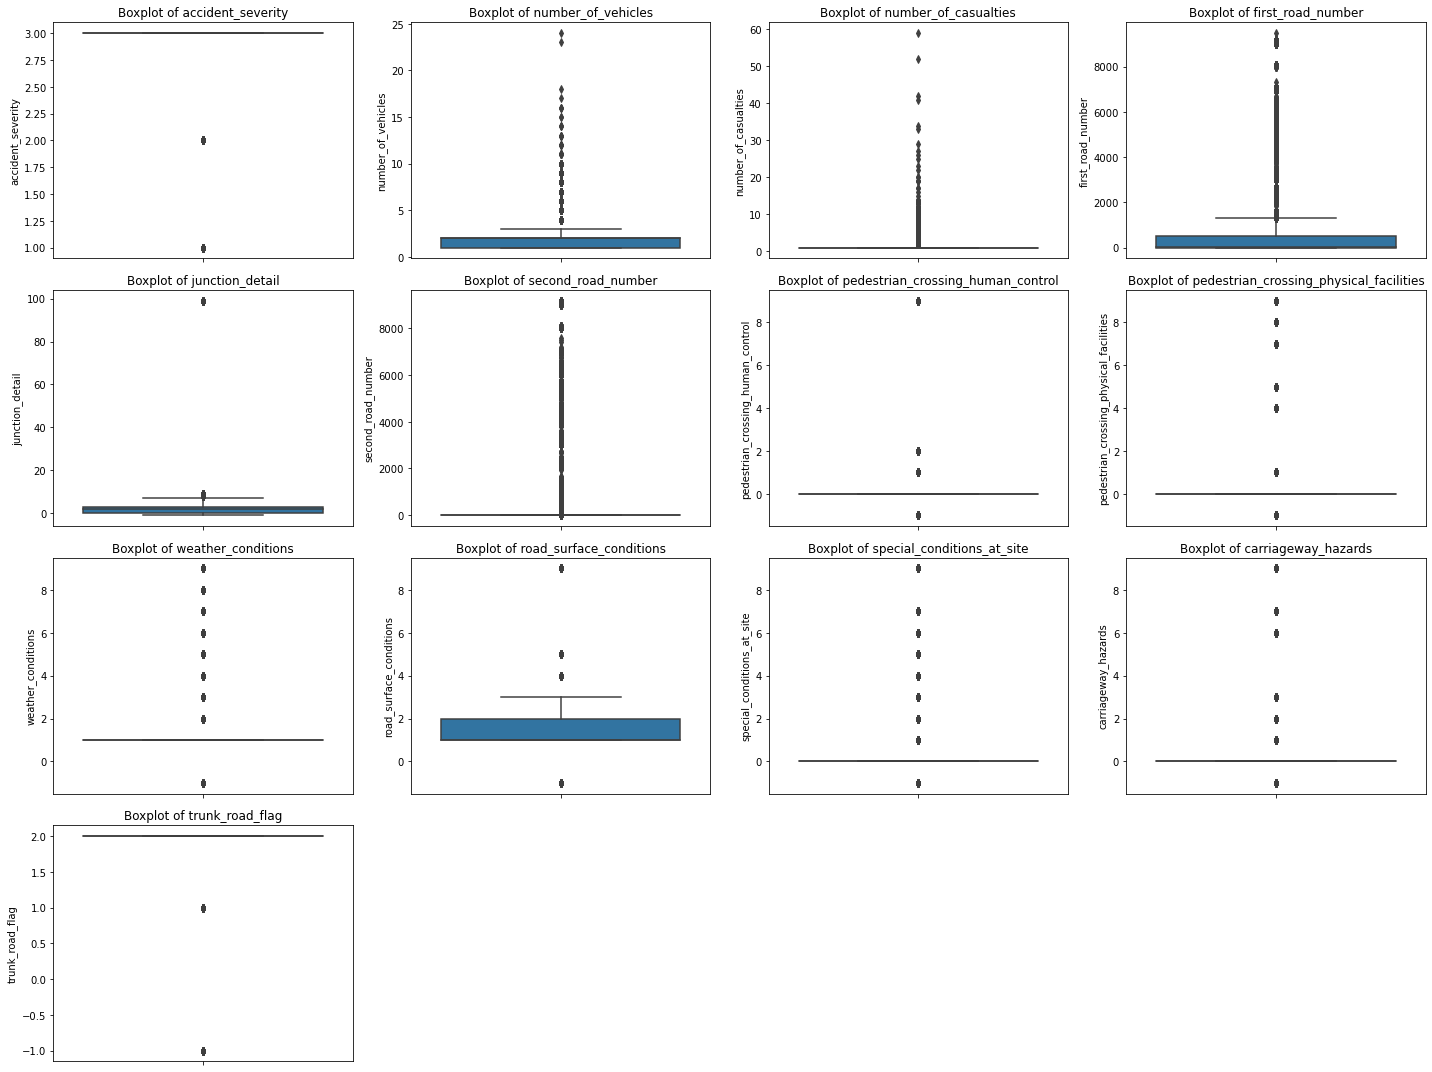

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns with suspected outliers based on your Z-score results
columns_with_outliers = ['accident_severity', 'number_of_vehicles', 'number_of_casualties', 
                         'first_road_number', 'junction_detail', 'second_road_number',
                         'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities',
                         'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site',
                         'carriageway_hazards', 'trunk_road_flag']

# Plot boxplots
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=column, data=modified_dft_road_accident_data)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [13]:
# Generate summary statistics for the dataset
summary_statistics = modified_dft_road_accident_data.describe(include='all')

# Display the summary statistics
print(summary_statistics)


        accident_index  accident_year accident_reference  \
count     5.624390e+05  562439.000000             562439   
unique    5.624390e+05            NaN             558332   
top       2.017010e+12            NaN          950000164   
freq      1.000000e+00            NaN                  3   
mean               NaN    2018.841359                NaN   
std                NaN       1.413635                NaN   
min                NaN    2017.000000                NaN   
25%                NaN    2018.000000                NaN   
50%                NaN    2019.000000                NaN   
75%                NaN    2020.000000                NaN   
max                NaN    2021.000000                NaN   

        location_easting_osgr  location_northing_osgr      longitude  \
count           562306.000000            5.623060e+05  562296.000000   
unique                    NaN                     NaN            NaN   
top                       NaN                     NaN          

In [18]:

# Convert 'date' and 'time' to datetime format if they are not
modified_dft_road_accident_data['date'] = pd.to_datetime(modified_dft_road_accident_data['date'], format='%d/%m/%Y')
modified_dft_road_accident_data['time'] = pd.to_datetime(modified_dft_road_accident_data['time'], format='%H:%M:%S').dt.time


# Time-Based Features
modified_dft_road_accident_data['hour_of_day'] = modified_dft_road_accident_data['time'].apply(lambda x: x.hour)
modified_dft_road_accident_data['day_of_week'] = modified_dft_road_accident_data['date'].dt.dayofweek
modified_dft_road_accident_data['month'] = modified_dft_road_accident_data['date'].dt.month
modified_dft_road_accident_data['year'] = modified_dft_road_accident_data['date'].dt.year
modified_dft_road_accident_data['is_weekend'] = modified_dft_road_accident_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Derived Features
average_speed_limit = modified_dft_road_accident_data['speed_limit'].mean()
modified_dft_road_accident_data['casualties_to_vehicles_ratio'] = modified_dft_road_accident_data['number_of_casualties'] / modified_dft_road_accident_data['number_of_vehicles']
modified_dft_road_accident_data['is_speed_limit_above_average'] = modified_dft_road_accident_data['speed_limit'].apply(lambda x: 1 if x > average_speed_limit else 0)

# Geographical Features
# Here you can add the code to calculate distance from the city center or to flag urban areas.

# Vehicle-Related Features
modified_dft_road_accident_data['high_capacity_vehicle'] = modified_dft_road_accident_data['number_of_vehicles'].apply(lambda x: 1 if x >= 3 else 0)

# Environmental Features
modified_dft_road_accident_data['poor_conditions'] = modified_dft_road_accident_data.apply(
    lambda row: 1 if row['weather_conditions'] > 1 or row['road_surface_conditions'] > 1 else 0, axis=1)

# Season
modified_dft_road_accident_data['season'] = modified_dft_road_accident_data['date'].dt.month % 12 // 3 + 1

# Save the modified dataset with the new features to a new CSV file
modified_dft_road_accident_data.to_csv('path_to_save_your_modified_dft_road_accident_data_with_features.csv', index=False)



In [19]:
# Save the modified dataset with the new features to a new CSV file
modified_dft_road_accident_data.to_csv('Feature engineered.csv', index=False)

In [20]:
pip install matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd

# Replace the path with your local path to the feature-engineered CSV file
feature_engineered_data = pd.read_csv('Feature engineered.csv')


C:\Users\anura\AppData\Local\Temp\ipykernel_16800\1309059438.py:4: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  feature_engineered_data = pd.read_csv('Feature engineered.csv')


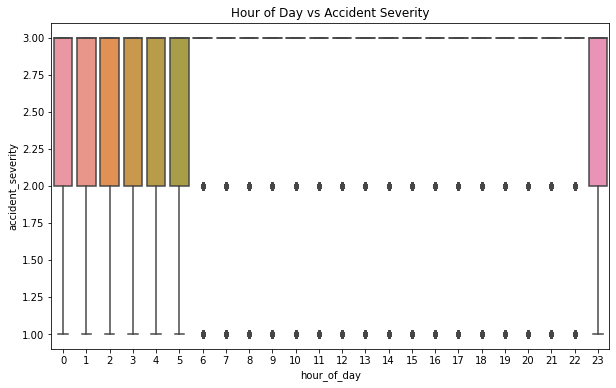

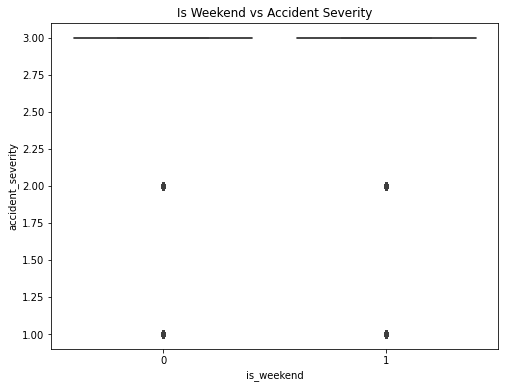

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hour of the day vs Accident Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour_of_day', y='accident_severity', data=feature_engineered_data)
plt.title('Hour of Day vs Accident Severity')
plt.show()

# Is it a weekend? vs Accident Severity
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_weekend', y='accident_severity', data=feature_engineered_data)
plt.title('Is Weekend vs Accident Severity')
plt.show()


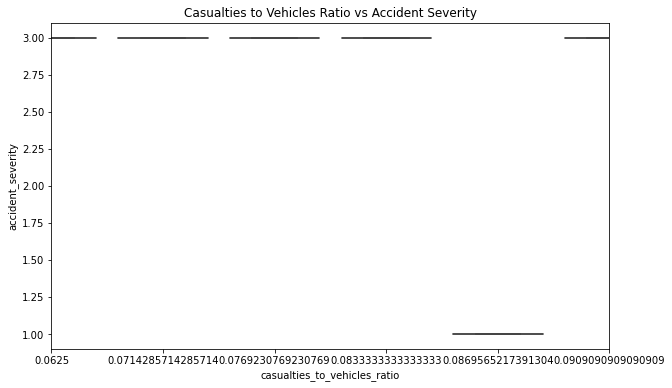

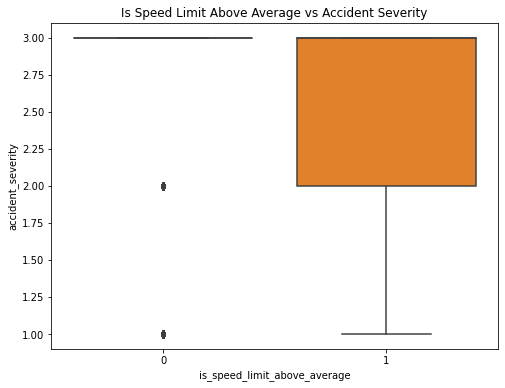

In [26]:
# Casualties to Vehicles Ratio vs Accident Severity
plt.figure(figsize=(10, 6))
sns.boxplot(x='casualties_to_vehicles_ratio', y='accident_severity', data=feature_engineered_data)
plt.title('Casualties to Vehicles Ratio vs Accident Severity')
plt.xlim(0, 5)  # Adjust as needed
plt.show()

# Is Speed Limit Above Average vs Accident Severity
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_speed_limit_above_average', y='accident_severity', data=feature_engineered_data)
plt.title('Is Speed Limit Above Average vs Accident Severity')
plt.show()


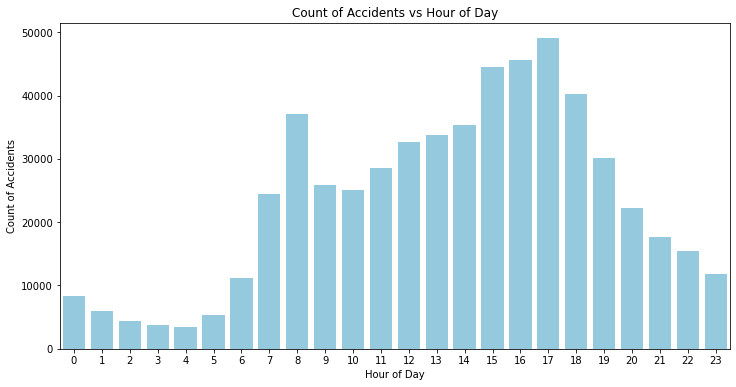

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of accidents vs Hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour_of_day', data=feature_engineered_data, color='skyblue')
plt.title('Count of Accidents vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Accidents')
plt.show()


In [2]:
import pandas as pd
# df = pd.read_csv('D:/Dissertation/Dataset/Analysis/feature.csv')
data = pd.read_csv('D:/Dissertation/Dataset/Analysis/CleanedData.csv')

In [3]:
data.columns

Index(['accident_severity', 'number_of_vehicles', 'number_of_casualties',
       'first_road_class', 'road_type', 'speed_limit', 'junction_detail',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'journey_purpose_of_driver', 'sex_of_driver',
       'propulsion_code', 'Safety Rating', 'engine_capacity_cc',
       'age_of_vehicle'],
      dtype='object')

In [4]:
import pandas as pd

# Assuming your data is stored in a DataFrame called 'data_df'
columns_to_encode = data.columns.difference(['accident_severity','engine_capacity_cc', 'age_of_vehicle'])
encoded_df = pd.get_dummies(data, columns=columns_to_encode)


In [5]:
df=encoded_df

In [6]:
len(df)

138599

In [10]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

for col in df.columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].astype(str)

# Label encoding
label_encoders = {}
encoded_data = df.copy()
for column in df.columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target variable
X = encoded_data.drop("accident_severity", axis=1)  # Replace 'accident_severity' with your target variable
y = encoded_data["accident_severity"]  # Replace 'accident_severity' with your target variable

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto')  # You can specify the `sampling_strategy` here
X_res, y_res = smote.fit_resample(X, y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize and train models
# MNL
mnl_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# mnl_model.fit(X_train, y_train)
# mnl_pred = mnl_model.predict(X_test)
# mnl_acc = accuracy_score(y_test, mnl_pred)
# print(f"Multinomial Logistic Regression Accuracy: {mnl_acc}")

# # RF
rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)
# rf_acc = accuracy_score(y_test, rf_pred)
# print(f"Random Forest Accuracy: {rf_acc}")

# DT
dt_model = DecisionTreeClassifier()
# dt_model.fit(X_train, y_train)
# svc
models = {'MNL': mnl_model, 'DT': dt_model, 'RF': rf_model}

# Loop through each model and evaluate
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)
    
#     # Cross-Validation
#     cross_val_scores = cross_val_score(model, X, y, cv=5)
#     print("Cross-Validation Scores:")
#     print(cross_val_scores)
#     print("Mean Cross-Validation Score:")
#     print(cross_val_scores.mean())
    
#     print("------")


ValueError: could not convert string to float: '1k-2k_cc'

In [6]:
# After fitting your model
coefficients = mnl_model.coef_
intercept = mnl_model.intercept_

# Print coefficients and intercepts
print("Coefficients: ", coefficients)
print("Intercept: ", intercept)


Coefficients:  [[-0.10462304 -0.13315338 -0.40096942 ...  0.01155512 -0.01490786
  -0.04215075]
 [ 0.07253629  0.06571141 -0.16150633 ... -0.03203266 -0.05338171
  -0.05224331]
 [ 0.03208675  0.06744197  0.56247576 ...  0.02047754  0.06828957
   0.09439407]]
Intercept:  [ 0.30841381  3.93239699 -4.2408108 ]


In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

for col in df.columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].astype(str)

# Label encoding
label_encoders = {}
encoded_data = df.copy()
for column in df.columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target variable
X = encoded_data.drop("accident_severity", axis=1)  # Replace 'accident_severity' with your target variable
y = encoded_data["accident_severity"]  # Replace 'accident_severity' with your target variable

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto')  # You can specify the `sampling_strategy` here
X_res, y_res = smote.fit_resample(X, y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize and train models
# MNL
mnl_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# mnl_model.fit(X_train, y_train)
# mnl_pred = mnl_model.predict(X_test)
# mnl_acc = accuracy_score(y_test, mnl_pred)
# print(f"Multinomial Logistic Regression Accuracy: {mnl_acc}")

# # RF
rf_model = RandomForestClassifier()
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)
# rf_acc = accuracy_score(y_test, rf_pred)
# print(f"Random Forest Accuracy: {rf_acc}")

# DT
dt_model = DecisionTreeClassifier()
# dt_model.fit(X_train, y_train)
# svc
models = {'MNL': mnl_model, 'DT': dt_model, 'RF': rf_model}

# Loop through each model and evaluate
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)
    
#     # Cross-Validation
#     cross_val_scores = cross_val_score(model, X, y, cv=5)
#     print("Cross-Validation Scores:")
#     print(cross_val_scores)
#     print("Mean Cross-Validation Score:")
#     print(cross_val_scores.mean())
    
#     print("------")


Evaluating MNL...


C:\Users\anura\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[19043  2825   399]
 [ 4700 12403  4979]
 [    7   130 22136]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     22267
           1       0.81      0.56      0.66     22082
           2       0.80      0.99      0.89     22273

    accuracy                           0.80     66622
   macro avg       0.80      0.80      0.79     66622
weighted avg       0.80      0.80      0.79     66622

Evaluating DT...
Confusion Matrix:
[[21977   109   181]
 [  703 17800  3579]
 [  381  4749 17143]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     22267
           1       0.79      0.81      0.80     22082
           2       0.82      0.77      0.79     22273

    accuracy                           0.85     66622
   macro avg       0.85      0.85      0.85     66622
weighted avg       0.85      0.85      0.85     66622

Evaluating 

In [8]:
import matplotlib.pyplot as plt
import scikitplot as skplt


models = {'MNL': mnl_model, 'DT': dt_model, 'RF': rf_model}

for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_prob = model.predict_proba(X_test)
    
    # Create a lift chart
    skplt.metrics.plot_lift_curve(y_true=y_test, y_probas=y_prob)
    plt.title(f"{name} Lift Chart")
    plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [8]:
pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\anura\\AppData\\Roaming\\Python\\Python39\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Check the permissions.



In [14]:
# ... [rest of the code remains unchanged]

# After fitting your model
coefficients = mnl_model.coef_
intercept = mnl_model.intercept_

def get_original_category(col_name):
    for original_col, le in label_encoders.items():
        if col_name.startswith(original_col):
            split_value = col_name.split("_")[-1]
            if split_value.isdigit():
                encoded_value = int(split_value)
                try:
                    return f"{original_col}_{le.inverse_transform([encoded_value])[0]}"
                except ValueError:  # If the value is not recognized by the encoder, return the original encoded value
                    return f"{original_col}_{encoded_value}"
    return col_name

# Try the mapping again using X.columns
mapped_features = [get_original_category(feature) for feature in X.columns]

# Create a list of dataframes for each class's coefficients
dfs = []
num_classes = coefficients.shape[0]
num_features = len(mapped_features)

for i in range(num_classes):
    df_class = pd.DataFrame({
        'Variable Name': mapped_features,
        'Coefficient': coefficients[i],
        'Intercept': [intercept[i]] * num_features
    })
    df_class['Class'] = label_encoders['accident_severity'].inverse_transform([i])[0]  # Assuming 'accident_severity' is the target variable
    dfs.append(df_class)

# Concatenate the dataframes
results_df_all_classes = pd.concat(dfs, axis=0).reset_index(drop=True)
results_df_all_classes


,Variable Name,Coefficient,Intercept,Class
0,engine_capacity_cc,-0.071089,2.949916,Fatal
1,age_of_vehicle,0.075962,2.949916,Fatal
2,Safety Rating_0_0,-0.161287,2.949916,Fatal
3,Safety Rating_1_1,-0.155476,2.949916,Fatal
4,Safety Rating_2_2,-0.140218,2.949916,Fatal
...,...,...,...,...
481,weather_conditions_Other,0.253292,-8.138849,Slight
482,weather_conditions_Raining,0.781367,-8.138849,Slight
483,weather_conditions_Raining+high winds,0.238453,-8.138849,Slight
484,weather_conditions_Snowing,0.109044,-8.138849,Slight


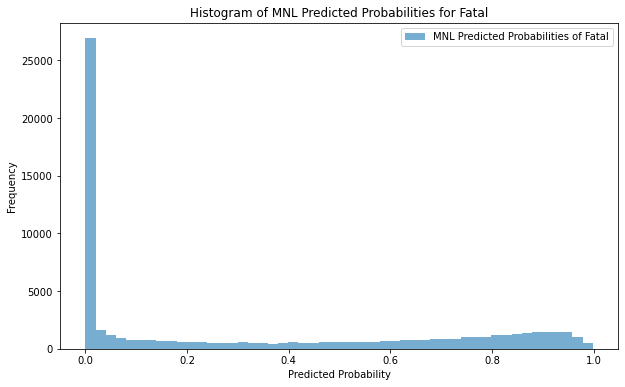

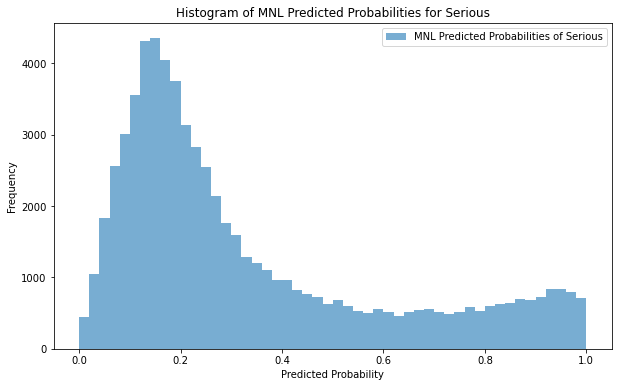

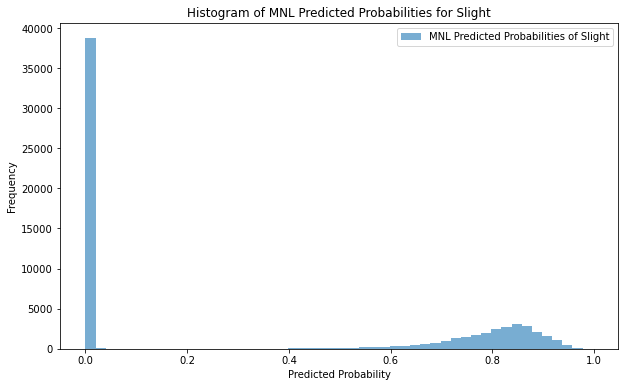

In [9]:
import matplotlib.pyplot as plt
# Predict the probabilities
probs_mnl = mnl_model.predict_proba(X_test)

# For a binary classification, you can use the probabilities of the positive class
if probs_mnl.shape[1] == 2:
    positive_probs_mnl = probs_mnl[:, 1]
    plt.hist(positive_probs_mnl, bins=50, alpha=0.6, label='MNL Predicted Probabilities')
    plt.title("Histogram of MNL Predicted Probabilities")
    plt.xlabel("Predicted Probability")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
# For multi-class, you may want to plot a histogram for each class in a subplot or separate figures
else:
    for i, class_label in enumerate(label_encoders['accident_severity'].classes_):
        plt.figure(figsize=(10,6))
        plt.hist(probs_mnl[:, i], bins=50, alpha=0.6, label=f'MNL Predicted Probabilities of {class_label}')
        plt.title(f"Histogram of MNL Predicted Probabilities for {class_label}")
        plt.xlabel("Predicted Probability")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()


In [19]:
# After fitting your model
coefficients = mnl_model.coef_
intercept = mnl_model.intercept_
def get_original_category(col_name):
    for original_col, le in label_encoders.items():
        if col_name.startswith(original_col):
            split_value = col_name.split("_")[-1]
            if split_value.isdigit():
                encoded_value = int(split_value)
                try:
                    return f"{original_col}_{le.inverse_transform([encoded_value])[0]}"
                except ValueError:  # If the value is not recognized by the encoder, return the original encoded value
                    return f"{original_col}_{encoded_value}"
    return col_name

# Try the mapping again
mapped_features = [get_original_category(feature) for feature in (X.columns)]
mapped_features# Create a list of dataframes for each class's coefficients
dfs = []
for i in range(num_classes):
    df_class = pd.DataFrame({
        'Variable Name': mapped_features,
        'Coefficient': coefficients[i],
        'Intercept': [intercept[i]] * num_features
    })
    df_class['Class'] = label_encoders['accident_severity'].inverse_transform([i])[0] # Assuming 'accident_severity' is the target variable
    dfs.append(df_class)

# Concatenate the dataframes
results_df_all_classes = pd.concat(dfs, axis=0).reset_index(drop=True)


In [15]:
results_df_all_classes.to_csv('D:/Dissertation/Dataset/Analysis/Analy.csv')

In [27]:
!pip uninstall tensorflow
!pip install tensorflow


^C
Defaulting to user installation because normal site-packages is not writeable


In [8]:
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

for col in df.columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].astype(str)

# Label encoding
label_encoders = {}
encoded_data = df.copy()
for column in df.columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target variable
X = encoded_data.drop("accident_severity", axis=1)  #  'accident_severity' is the  target variable
y = encoded_data["accident_severity"]  # 'accident_severity' is the  target variable

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto')  
X_res, y_res = smote.fit_resample(X, y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {}

# Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=3, activation='softmax'))  #  'accident_severity' has 3 classes

# Compile the model
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Add the ANN model to the models dictionary
models['ANN'] = ann_model

# Modify the evaluation loop to handle the ANN differently
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    if name == 'ANN':
        # Train the ANN
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
        
        # Make predictions
        y_pred = model.predict(X_test).argmax(axis=1)
    else:
        # Fit the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        


    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)
    
    # If you want to include cross-validation for other models, you can do so here.
    
    print("------")


Evaluating ANN...
Epoch 1/10
8328/8328 [==============================] - 16s 2ms/step - loss: 0.3989 - accuracy: 0.8412
Epoch 2/10
8328/8328 [==============================] - 16s 2ms/step - loss: 0.3036 - accuracy: 0.8848
Epoch 3/10
8328/8328 [==============================] - 15s 2ms/step - loss: 0.2739 - accuracy: 0.8959
Epoch 4/10
8328/8328 [==============================] - 14s 2ms/step - loss: 0.2589 - accuracy: 0.9010
Epoch 5/10
8328/8328 [==============================] - 15s 2ms/step - loss: 0.2486 - accuracy: 0.9042
Epoch 6/10
8328/8328 [==============================] - 15s 2ms/step - loss: 0.2421 - accuracy: 0.9064
Epoch 7/10
8328/8328 [==============================] - 11s 1ms/step - loss: 0.2352 - accuracy: 0.9083
Epoch 8/10
8328/8328 [==============================] - 14s 2ms/step - loss: 0.2307 - accuracy: 0.9098
Epoch 9/10
8328/8328 [==============================] - 12s 1ms/step - loss: 0.2268 - accuracy: 0.9111
Epoch 10/10
2082/2082 [==============================] 

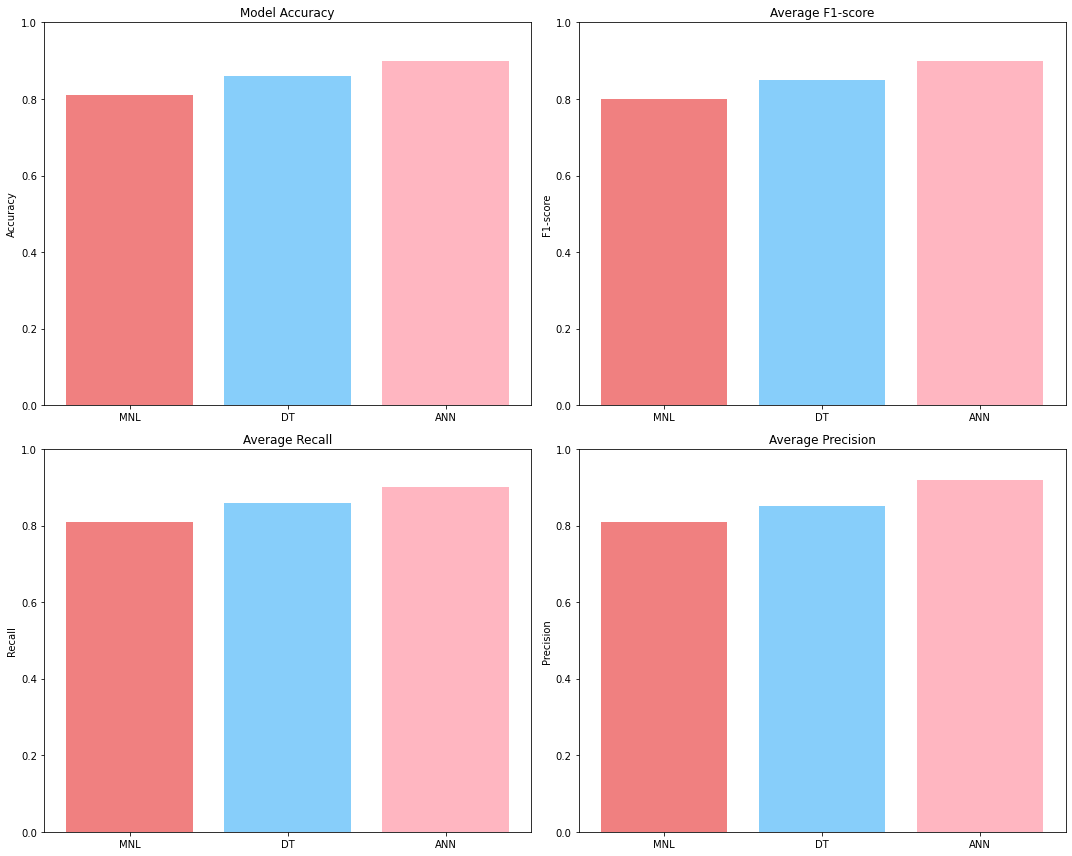

In [16]:
import matplotlib.pyplot as plt

# Data
models = ['MNL', 'DT', 'ANN']
accuracy = [0.81, 0.86, 0.90]
f1_avg = [0.80, 0.85, 0.90]
recall_avg = [0.81, 0.86, 0.90]
precision_avg = [0.81, 0.85, 0.92]

# Create the plots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy
axs[0, 0].bar(models, accuracy, color=['#F08080', '#87CEFA', '#FFB6C1'])
axs[0, 0].set_title('Model Accuracy')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim(0, 1)

# F1-score
axs[0, 1].bar(models, f1_avg, color=['#F08080', '#87CEFA', '#FFB6C1'])
axs[0, 1].set_title('Average F1-score')
axs[0, 1].set_ylabel('F1-score')
axs[0, 1].set_ylim(0, 1)

# Recall
axs[1, 0].bar(models, recall_avg, color=['#F08080', '#87CEFA', '#FFB6C1'])
axs[1, 0].set_title('Average Recall')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_ylim(0, 1)

# Precision
axs[1, 1].bar(models, precision_avg, color=['#F08080', '#87CEFA', '#FFB6C1'])
axs[1, 1].set_title('Average Precision')
axs[1, 1].set_ylabel('Precision')
axs[1, 1].set_ylim(0, 1)

plt.tight_layout()
plt.show()


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


# List of models
models = {'MNL': mnl_model, 'RF': rf_model, 'SVM': svm_model}

# Loop through each model and evaluate
for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
   # Classification Report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(class_report)
    
    # Cross-Validation
    cross_val_scores = cross_val_score(model, X, y, cv=5)
    print("Cross-Validation Scores:")
    print(cross_val_scores)
    print("Mean Cross-Validation Score:")
    print(cross_val_scores.mean())
    
    print("------")

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df.drop("accident_severity", axis=1)
y = df["accident_severity"]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Now, X_res and y_res are the resampled features and labels, respectively


NameError: name 'mnl_model' is not defined

In [12]:
import sklearn
import imblearn
print("Scikit-learn version:", sklearn.__version__)
print("Imbalanced-learn version:", imblearn.__version__)


ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (C:\Users\anura\AppData\Roaming\Python\Python39\site-packages\imblearn\utils\_validation.py)

In [7]:
# Feature importances
importances = rf_model.feature_importances_
print("Feature Importances: ", importances)


Feature Importances:  [4.09060516e-02 3.51261086e-02 1.16731075e-02 1.20724786e-02
 5.16897727e-03 7.18230326e-07 8.91125024e-06 2.91802529e-03
 4.88356873e-03 8.75819381e-03 7.12440386e-03 6.30280971e-03
 3.81066568e-03 2.17439885e-03 1.71931799e-03 4.13829784e-05
 2.55819405e-03 6.68603261e-05 3.22325497e-04 8.86210827e-05
 3.98694623e-05 9.04420839e-05 6.98300390e-05 6.41706976e-03
 6.88263490e-03 7.03800977e-03 6.92105316e-03 8.15474261e-03
 6.05161209e-03 5.18006341e-03 4.61688271e-03 1.23801552e-02
 3.86327256e-03 4.39474647e-03 3.88838896e-03 3.77247632e-03
 4.09166775e-03 3.58505696e-03 3.94878348e-03 3.98242781e-03
 3.34618287e-03 3.17523907e-03 2.79908968e-03 2.78981576e-03
 2.46246286e-03 1.53708525e-04 1.85177214e-03 1.12828052e-02
 1.72293568e-02 6.17351959e-03 6.78921676e-03 2.65584302e-04
 2.04403264e-03 1.08981069e-04 1.13714703e-02 5.79807874e-03
 2.24203721e-03 1.73535975e-02 1.16571849e-04 4.60192308e-03
 2.02422783e-05 2.20176153e-05 7.90687640e-04 2.17987023e-06
 3